In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("C:\\Users\\E L I T E B O O K\\Downloads\\student-data.csv")

In [3]:
# Попередній аналіз даних
# Перші 5 рядків
print("Перші 5 рядків датасету:")
print(df.head())

Перші 5 рядків датасету:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absences passed  
0       no       no       4         3      4    1    1      3        6     no  
1      yes       no       5         3      3    1    1      3        4     no  
2      yes       no       4         3      2    2    3      3       10    yes  
3      yes      yes       3         2      2    1    1      5        2    yes  
4       no       no       4         3      2    1    2      5        4    yes  

[5 rows

In [4]:
# Розмір датасету (кількість рядків і стовпців)
print("\nРозмір датасету (рядки, стовпці):")
print(df.shape)

# Типи даних
print("\nТипи даних для кожного стовпця:")
print(df.dtypes)



Розмір датасету (рядки, стовпці):
(395, 31)

Типи даних для кожного стовпця:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object


In [5]:
# Перевірка на пропущені значення
print("\nКількість пропущених значень у кожному стовпці:")
print(df.isnull().sum())


Кількість пропущених значень у кожному стовпці:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64


In [6]:
# Перевірка на дублікати
duplicates = df.duplicated()

print("\nКількість дублікованих рядків:")
print(duplicates.sum())


Кількість дублікованих рядків:
0


In [7]:
# Описова статистика для всіх типів даних
print("\nОписова статистика для всіх типів даних:")
print(df.describe(include='all'))


Описова статистика для всіх типів даних:
       school  sex         age address famsize Pstatus        Medu  \
count     395  395  395.000000     395     395     395  395.000000   
unique      2    2         NaN       2       2       2         NaN   
top        GP    F         NaN       U     GT3       T         NaN   
freq      349  208         NaN     307     281     354         NaN   
mean      NaN  NaN   16.696203     NaN     NaN     NaN    2.749367   
std       NaN  NaN    1.276043     NaN     NaN     NaN    1.094735   
min       NaN  NaN   15.000000     NaN     NaN     NaN    0.000000   
25%       NaN  NaN   16.000000     NaN     NaN     NaN    2.000000   
50%       NaN  NaN   17.000000     NaN     NaN     NaN    3.000000   
75%       NaN  NaN   18.000000     NaN     NaN     NaN    4.000000   
max       NaN  NaN   22.000000     NaN     NaN     NaN    4.000000   

              Fedu   Mjob   Fjob  ... internet romantic      famrel  \
count   395.000000    395    395  ...      395

In [9]:
# Вибір цільового стовпця
target_column = 'passed'

# Перевірка унікальних значень цільової змінної
print(f"\nУнікальні значення стовпця '{target_column}':")
print(df[target_column].unique())

# Перевірка типу даних цільової змінної
print(f"\nТип даних стовпця '{target_column}':")
print(df[target_column].dtype)


Унікальні значення стовпця 'passed':
['no' 'yes']

Тип даних стовпця 'passed':
object


In [11]:
# Перетворення категоріальних змінних
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'passed':  # Не перетворювати цільовий стовпець
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [12]:
# Вибір ознак і цільової змінної
X = df.drop('passed', axis=1)
y = df['passed']

In [13]:
# Розділення даних на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Масштабування даних
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Налаштування моделей і параметрів
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    'SVM': {
        'C': [0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    }
}

In [16]:
# Підбір оптимальних параметрів і оцінка моделей
for name, model in models.items():
    print(f"\nПобудова і оцінка моделі: {name}")
    
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Найкращі параметри
    print(f"Найкращі параметри для {name}:")
    print(grid_search.best_params_)
    
    # Оцінка моделі
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    print(f"\nОцінка моделі {name}:")
    print(classification_report(y_test, y_pred))
    print("Матриця плутанини:")
    print(confusion_matrix(y_test, y_pred))


Побудова і оцінка моделі: Logistic Regression
Найкращі параметри для Logistic Regression:
{'C': 0.01, 'solver': 'saga'}

Оцінка моделі Logistic Regression:
              precision    recall  f1-score   support

          no       0.71      0.11      0.19        46
         yes       0.63      0.97      0.77        73

    accuracy                           0.64       119
   macro avg       0.67      0.54      0.48       119
weighted avg       0.66      0.64      0.54       119

Матриця плутанини:
[[ 5 41]
 [ 2 71]]

Побудова і оцінка моделі: Random Forest
Найкращі параметри для Random Forest:
{'max_depth': 30, 'n_estimators': 100}

Оцінка моделі Random Forest:
              precision    recall  f1-score   support

          no       0.69      0.20      0.31        46
         yes       0.65      0.95      0.77        73

    accuracy                           0.66       119
   macro avg       0.67      0.57      0.54       119
weighted avg       0.67      0.66      0.59       119

Мат

In [19]:
# Вибір ознак і масштабування даних
X = df.drop('passed', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Метод ліктя
inertia = []
k_range = range(1, 11)  # Перевіряємо кількість кластерів від 1 до 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THRE

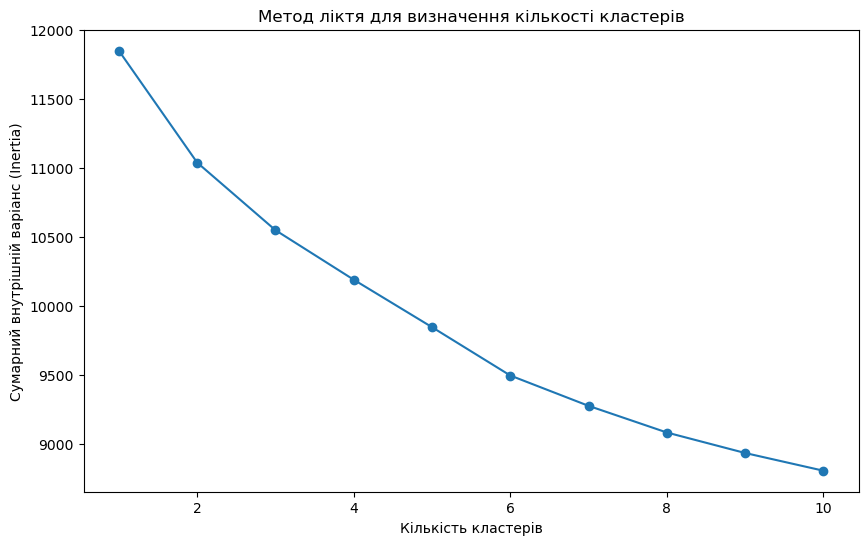

In [21]:
# Візуалізація методу ліктя
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Сумарний внутрішній варіанс (Inertia)')
plt.title('Метод ліктя для визначення кількості кластерів')
plt.show()

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

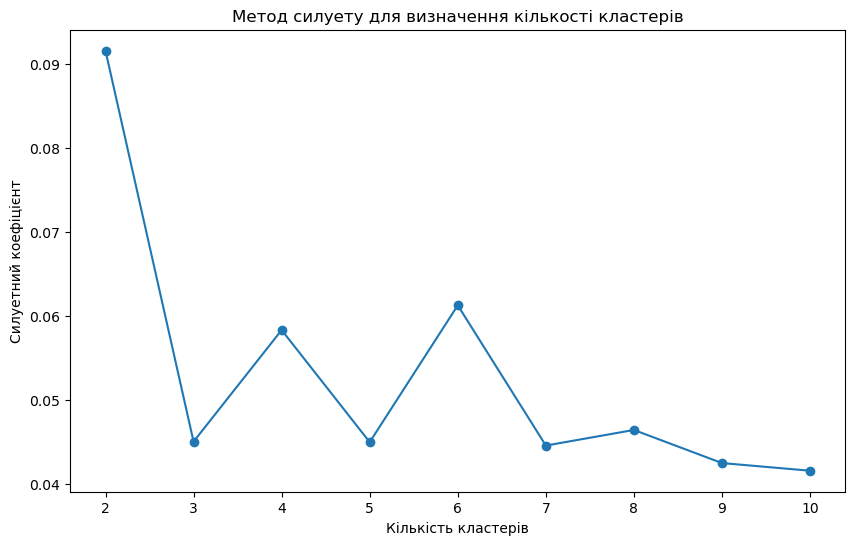

In [22]:
# Метод силуету
silhouette_scores = []

for k in k_range[1:]:  # Починаємо з 2, оскільки для 1 кластеру силуетний коефіцієнт не розраховується
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Візуалізація методу силуету
plt.figure(figsize=(10, 6))
plt.plot(k_range[1:], silhouette_scores, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний коефіцієнт')
plt.title('Метод силуету для визначення кількості кластерів')
plt.show()

In [23]:
# Вибір оптимальної кількості кластерів (наприклад, 3)
optimal_k = 3

# Кластеризація з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


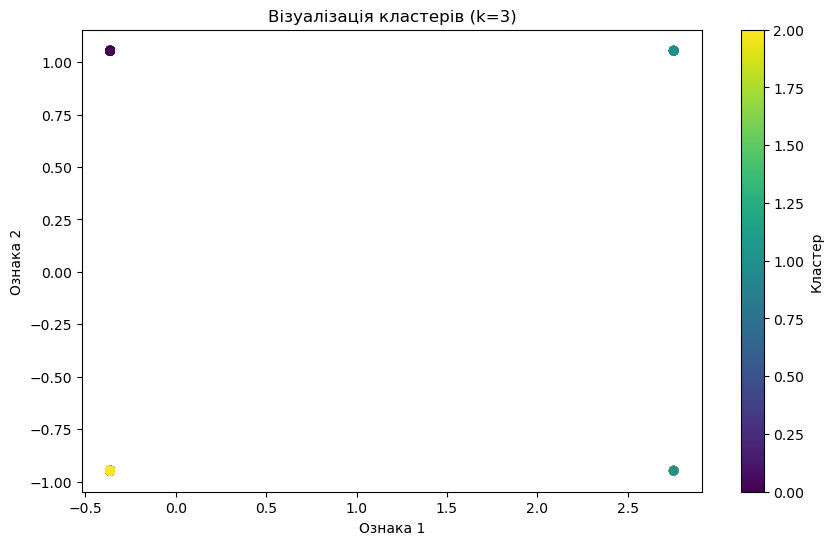

In [24]:
# Візуалізація кластерів (для 2D-візуалізації)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.title(f'Візуалізація кластерів (k={optimal_k})')
plt.colorbar(label='Кластер')
plt.show()

 Метод ліктя
Опис результатів: Графік методу ліктя показує, як змінюється сумарний внутрішній варіанс (Inertia) залежно від кількості кластерів. Зазвичай, зменшення варіансу сповільнюється при досягненні оптимальної кількості кластерів, що видно у вигляді "ліктя" на графіку.
Висновок: Оптимальна кількість кластерів визначається за місцем "ліктя" на графіку. Це значення дає уявлення про те, скільки кластерів краще всього описує дані, забезпечуючи хороший баланс між кількістю кластерів і варіацією всередині кластерів.
2. Метод силуету
Опис результатів: Графік методу силуету відображає середній силуетний коефіцієнт для різної кількості кластерів. Силуетний коефіцієнт показує, наскільки добре кожен об'єкт вписується в свій кластер у порівнянні з іншими кластерами.
Висновок: Оптимальна кількість кластерів визначається як кількість, при якій середній силуетний коефіцієнт максимальний. Це означає, що об'єкти в кластері максимально схожі один з одним і відрізняються від об'єктів в інших кластерах.
3. Візуалізація кластерів
Опис результатів: Візуалізація кластерів (на основі перших двох ознак або за допомогою методів зниження вимірності, таких як PCA) показує, як дані розподілені між кластерами. Це дозволяє оцінити якість кластеризації та виявити структуру даних.
Висновок: Візуалізація допомагає перевірити, чи є кластери розділеними і зрозумілими. Якщо кластери чітко відокремлені, це свідчить про успішну кластеризацію. Якщо класи перекриваються, можливо, потрібно переглянути кількість кластерів або використовувати інші алгоритми кластеризації.
Загальні висновки
Оптимальна кількість кластерів: На основі методів ліктя та силуету була визначена оптимальна кількість кластерів, яка забезпечує найкраще розбиття даних на групи.

Кластеризація даних: За допомогою обраної кількості кластерів виконано кластеризацію, і результати візуалізації підтверджують, що обрана кількість кластерів адекватно відображає структуру даних. Метод ліктя
Опис результатів: Графік методу ліктя показує, як змінюється сумарний внутрішній варіанс (Inertia) залежно від кількості кластерів. Зазвичай, зменшення варіансу сповільнюється при досягненні оптимальної кількості кластерів, що видно у вигляді "ліктя" на графіку.
Висновок: Оптимальна кількість кластерів визначається за місцем "ліктя" на графіку. Це значення дає уявлення про те, скільки кластерів краще всього описує дані, забезпечуючи хороший баланс між кількістю кластерів і варіацією всередині кластерів.
2. Метод силуету
Опис результатів: Графік методу силуету відображає середній силуетний коефіцієнт для різної кількості кластерів. Силуетний коефіцієнт показує, наскільки добре кожен об'єкт вписується в свій кластер у порівнянні з іншими кластерами.
Висновок: Оптимальна кількість кластерів визначається як кількість, при якій середній силуетний коефіцієнт максимальний. Це означає, що об'єкти в кластері максимально схожі один з одним і відрізняються від об'єктів в інших кластерах.
3. Візуалізація кластерів
Опис результатів: Візуалізація кластерів (на основі перших двох ознак або за допомогою методів зниження вимірності, таких як PCA) показує, як дані розподілені між кластерами. Це дозволяє оцінити якість кластеризації та виявити структуру даних.
Висновок: Візуалізація допомагає перевірити, чи є кластери розділеними і зрозумілими. Якщо кластери чітко відокремлені, це свідчить про успішну кластеризацію. Якщо класи перекриваються, можливо, потрібно переглянути кількість кластерів або використовувати інші алгоритми кластеризації.
Загальні висновки
Оптимальна кількість кластерів: На основі методів ліктя та силуету була визначена оптимальна кількість кластерів, яка забезпечує найкраще розбиття даних на групи.

Кластеризація даних: За допомогою обраної кількості кластерів виконано кластеризацію, і результати візуалізації підтверджують, що обрана кількість кластерів адекватно відображає структуру даних.